Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

In [ ]:
# Please add your name and University of Michagan uniqname here...

NAME = 'Liwen Huang'
UMICH_UNIQNAME = 'liwenh'

---

In [ ]:
version = "v3.3.012821"

# SIADS 515 Week 2 Homework (HW2)

A Pandas DataFrame can be populated with a generator:

In [1]:
def gen_three_data():
    '''
    Generate 3 dictionaries with keys A and B
    '''
    for i in range(3):
        yield {
            "A": i + 1, # simple
            "B": (i + 1) * 10, # some math
        }

In [2]:
import pandas as pd

pd.DataFrame(data=gen_three_data())

,A,B
0,1,10
1,2,20
2,3,30


We can also add a parameter to the generator:

In [3]:
import numpy as np
def gen_some_data(n):
    '''
    Generate n dictionaries with keys A, B and C
    '''
    for i in range(n):
        yield {
            "A": i + 1, # simple
            "B": (i + 1) * 10, # some math
            "C": np.random.randn() # a random number drawn from a standard normal distribution
        }

In [4]:
import pandas as pd

pd.DataFrame(data=gen_some_data(10))

,A,B,C
0,1,10,-1.473092
1,2,20,-0.402737
2,3,30,-0.076180
3,4,40,-0.706732
4,5,50,0.460572
5,6,60,-0.079320
6,7,70,-1.276415
7,8,80,0.299443
8,9,90,0.883232
9,10,100,-0.885426


There are times when using this technique can be a nice way to solve problems that would be hard to solve in other ways.

---

## Question 1

We need to get the data from the file `assets/companies_small_set.data` into a DataFrame. The problem is that the data on each line of the file is in either a [JSON](https://en.wikipedia.org/wiki/JSON) or [Tab-separated values (TSV)](https://en.wikipedia.org/wiki/Tab-separated_values) format.

The JSON lines are in the correct format, they just need to be converted to native Python `dict`s.

The TSV lines need to be converted in to `dict`s that match the JSON format.

Write a generator `gen_fixed_data` that takes an iterator as an arguement. It should parse the values in the iterator and yield each value in the correct format: A `dict` with the keys:

- company
- catch_phrase
- phone
- timezone
- client_count

In [5]:
import json

def gen_fix_data(data_iterator):
    for i in data_iterator:
        dict = {}
        if '\t' in i:
            i = i.split('\t')

            dict['company'] = i[0]
            dict['catch_phrase'] = i[1]
            dict['phone'] = i[2]
            dict['timezone'] = i[3]
            dict['client_count'] = int(i[4])

            yield dict
        elif '{' in i:
            item = json.loads(i)
            dict.update(item)

            yield dict
            
    # YOUR CODE HERE
    

If the generator is correctly fixing the data formats, we should be able to use it to populate a DataFrame...

In [6]:
with open('assets/companies_small_set.data', 'r') as broken_data:
    df = pd.DataFrame(data=gen_fix_data(broken_data))
df

,company,catch_phrase,phone,timezone,client_count
0,Watkins Inc,Integrated radical installation,7712422719,America/New_York,442
1,Bennett and Sons,Persistent contextually-based standardization,018.666.0600,America/Los_Angeles,492
2,Ferguson-Garner,Multi-layered tertiary neural-net,(086)401-8955x53502,America/Los_Angeles,528
3,Pennington PLC,Future-proofed tertiary frame,+1-312-296-2956x137,America/Indiana/Indianapolis,638
4,Perry PLC,Managed full-range secured line,825-403-2850x005,America/Chicago,474
5,Brown-Knight,Reverse-engineered intangible model,+1-388-334-1572,America/New_York,453
6,Vargas Group,Ameliorated tangible software,001-724-417-1375x0152,America/Chicago,676
7,"Collins, Hanson and Flores",Future-proofed leadingedge moratorium,894-945-1213,America/Los_Angeles,389
8,Jones-Mcmahon,Multi-lateral directional interface,001-581-051-4431x5960,America/New_York,460
9,Herrera-Young,Networked disintermediate structure,(663)944-2205,America/New_York,816


In [7]:
# This cell runs a series of assert statements to grade your solution.

with open('assets/companies_small_set.data', 'r') as broken_data:
    gen = gen_fix_data(broken_data)
    
    # Let's make sure gen_fix_data is a generator function...
    from types import GeneratorType
    assert type(gen) == GeneratorType, 'wrong type, should be a generator'
    

    # Check the first entry from companies_small_set.data...
    entry1 = next(gen)
    assert entry1['company'] == "Watkins Inc", 'incorrect value for entry1["company"]'
    assert entry1['catch_phrase'] == "Integrated radical installation", \
        'incorrect value for entry1["catch_phrase"]'
    assert entry1['phone'] == '7712422719', 'incorrect value for entry1["phone"]'
    assert entry1['timezone'] == "America/New_York", 'incorrect value for entry1["timezone"]'
    assert type(entry1['client_count']) == int, 'entry1["client_count"] is not an int'
    assert entry1['client_count'] == 442, 'incorrect value for entry1["client_count"]'

    # Check the second entry from companies_small_set.data...
    entry2 = next(gen)
    assert entry2['company'] == "Bennett and Sons", 'incorrect value for entry2["company"]'
    assert entry2['catch_phrase'] == "Persistent contextually-based standardization", \
        'incorrect value for entry2["catch_phrase"]'
    assert entry2['phone'] == "018.666.0600", 'incorrect value for entry2["phone"]'
    assert entry2['timezone'] == "America/Los_Angeles", 'incorrect value for entry2["timezone"]'
    assert type(entry2['client_count']) == int, 'entry2["client_count"] is not an int'
    assert entry2['client_count'] == 492, 'incorrect value for entry2["client_count"]'

In [8]:
# This cell runs a series of assert statements to grade your solution against different data.
import io

test_data = io.StringIO(
    'Chang, Fisher and Green	Open-architected foreground productivity	759.382.4219	'
        'America/Los_Angeles	770\n'
    'Patel, Thornton and Guzman	Customizable asynchronous approach	+1-578-156-5938x77840	'
        'America/Los_Angeles	418\n'
    'Smith-Cortez	Integrated solution-oriented moratorium	7535139332	'
        'America/Los_Angeles	634\n'
    '{"company": "Miller-Flores", "catch_phrase": "Object-based user-facing array", "phone": "(185)839-8947x19659", '
        '"timezone": "America/New_York", "client_count": 634}\n'
)
generated = pd.DataFrame(gen_fix_data(test_data))

correct = pd.DataFrame([{'company': 'Chang, Fisher and Green',
  'catch_phrase': 'Open-architected foreground productivity',
  'phone': '759.382.4219',
  'timezone': 'America/Los_Angeles',
  'client_count': 770},
 {'company': 'Patel, Thornton and Guzman',
  'catch_phrase': 'Customizable asynchronous approach',
  'phone': '+1-578-156-5938x77840',
  'timezone': 'America/Los_Angeles',
  'client_count': 418},
 {'company': 'Smith-Cortez',
  'catch_phrase': 'Integrated solution-oriented moratorium',
  'phone': '7535139332',
  'timezone': 'America/Los_Angeles',
  'client_count': 634},
 {'company': 'Miller-Flores',
  'catch_phrase': 'Object-based user-facing array',
  'phone': '(185)839-8947x19659',
  'timezone': 'America/New_York',
  'client_count': 634},
])

assert len(generated) == len(correct), 'wrong number of rows'
assert all(g == c for g, c in zip(generated.columns.sort_values(), correct.columns.sort_values())), \
    'columns names do not match'

for col in generated.columns:
    for i in range(len(generated)):
        assert generated[col][i] == correct[col][i], \
            f'wrong value at column "{col}", index "{i}", {generated[col][i]} != {correct[col][i]}'

## Question 2

The data in `assets/server_metrics.csv` represents the time it take to handle requests in a start-up company's web application. Let's imagine we are asked to write some code that gives us a DataFrame that just contains the entries where `processing_time` is greater than 160 milliseconds.

We could solve that problem like this...

In [11]:
df = pd.read_csv('assets/server_metrics.csv')

In [12]:
outliers = df[df['processing_time'] > 160]

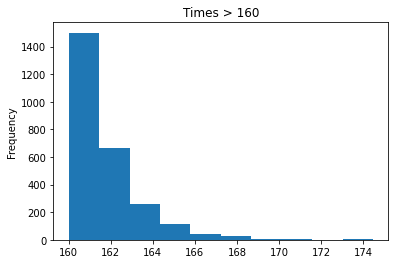

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

_ = outliers['processing_time'].plot.hist(title="Times > 160")

But imagine that instead of dealing with millions of rows, we have to deal with billions or trillions and the set is too big to fit comfortably in memory, or that the data is coming to us not in a local file, but is being read over the network. Generators can be a nice way to help in that situation.

Here is a generator that yields a `dict` for each line in `assets/server_metrics.csv`.

In [14]:
def metrics_stream():
    '''
    Generate dictionaries from each line in assets/server_metrics.csv
    '''
    import csv

    with open('assets/server_metrics.csv', 'r') as stream:
        csv_stream = csv.DictReader(stream, ['job_id', 'processing_time', 'instance_id'])
        next(csv_stream) # throw away header row
        for entry in csv_stream:
            entry['processing_time'] = float(entry['processing_time'])
            yield dict(entry)

For this problem, write a generator that can be used to create a DataFrame like the `outliers` one above. Its first parameter should be the iterable we get from the `metrics_stream()` generator function. Its second (optional) parameter should be called `lower_bound` and be used to filter entries whose "processing_time" is less than or equal to this parameter.

In [16]:
def gen_outliers(metrics_iterable, lower_bound=160):
    for i in metrics_iterable:
        if i['processing_time'] > lower_bound:
            i['processing_time'] = float(i['processing_time'])
            yield i
    # YOUR CODE HERE
    

In [17]:
metrics_gen = metrics_stream() 

generated_outliers = pd.DataFrame(gen_outliers(metrics_gen))

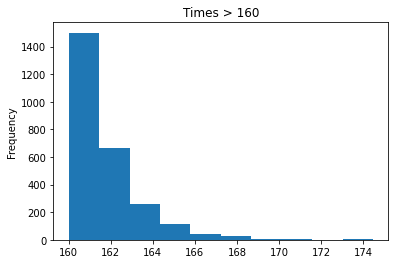

In [18]:
# This should generate the same plot as the plot above
_ = generated_outliers['processing_time'].plot.hist(title="Times > 160")

In [19]:
# This cell runs a series of assert statements to grade your solution.

gen = gen_outliers(metrics_stream())
    
# Let's make sure gen_fix_data is a generator function...
from types import GeneratorType
assert type(gen) == GeneratorType, 'wrong type, should be a generator'

# check that data matches

outliers_160 = pd.DataFrame(gen_outliers(metrics_stream(), lower_bound=160))
assert len(outliers_160) == 2615, 'wrong number of entries for lower_bound=160'

outliers_150 = pd.DataFrame(gen_outliers(metrics_stream(), lower_bound=150))
assert len(outliers_150) == 556826, 'wrong number of entries for lower_bound=150'

outliers_170 = pd.DataFrame(gen_outliers(metrics_stream(), lower_bound=170))
assert len(outliers_170) == 9, 'wrong number of entries for lower_bound=170'

In [20]:
# This cell runs a series of assert statements to grade your solution against different data.
import io

test_data = [
    {
        'job_id': '336',
        'processing_time': 150.83086863345971,
        'instance_id': '1346846',
    },
    {
        'job_id': '337',
        'processing_time': 168.37830864466645,
        'instance_id': '1349783',
    },
    {
         'job_id': '338',
         'processing_time': 148.8572313268281,
         'instance_id': '1345472',
    },
    {
        'job_id': '339',
        'processing_time': 148.39006806562258,
        'instance_id': '1347784',
    },
]


outliers_160 = pd.DataFrame(gen_outliers(test_data, lower_bound=160))
assert len(outliers_160) == 1, 'wrong number of entries for lower_bound=160'

outliers_150 = pd.DataFrame(gen_outliers(test_data, lower_bound=150))
assert len(outliers_150) == 2, 'wrong number of entries for lower_bound=150'

outliers_170 = pd.DataFrame(gen_outliers(test_data, lower_bound=170))
assert len(outliers_170) == 0, 'wrong number of entries for lower_bound=170'